In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
datas=pd.read_csv("~/Downloads/Dataset/electricity_cost_dataset.csv")
df=datas.copy()
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [5]:
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [7]:
df['structure type'].value_counts()

structure type
Residential    3939
Commercial     3005
Mixed-use      2052
Industrial     1004
Name: count, dtype: int64

In [8]:
df['structure type']=df["structure type"].map({"Residential":1, "Commercial":2,"Mixed-use":3, "Industrial":4, 1:1,2:2,3:3,4:4})

In [9]:
df['structure type']=df['structure type'].astype(int)

# Handling outliers


<Axes: ylabel='water consumption'>

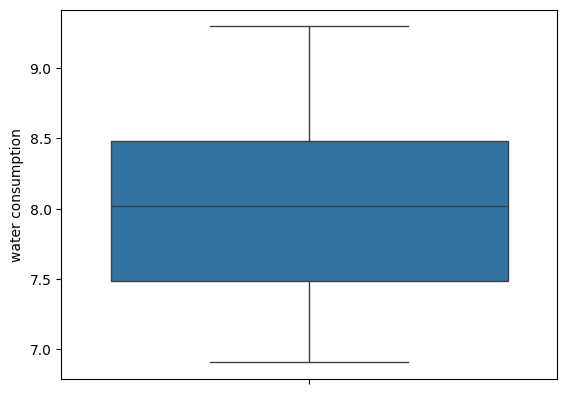

In [10]:
df["water consumption"]=np.log(df["water consumption"])
sns.boxplot(df["water consumption"])


<Axes: ylabel='water consumption'>

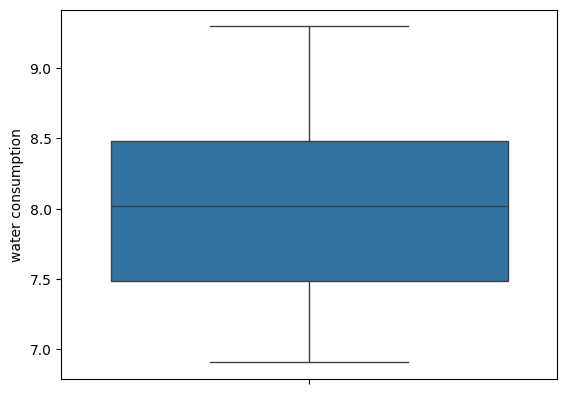

In [11]:
sns.boxplot(df['water consumption'])

<Axes: ylabel='recycling rate'>

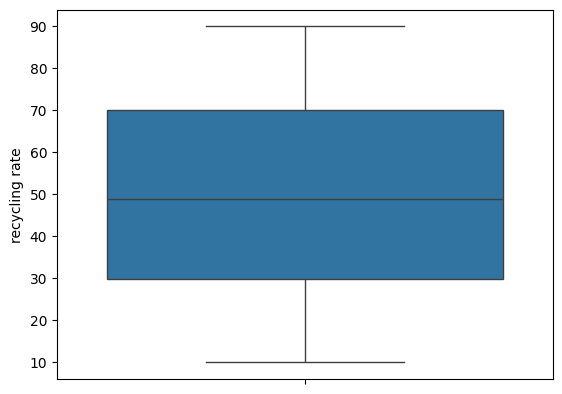

In [12]:
sns.boxplot(y="recycling rate",data= df)

<Axes: ylabel='utilisation rate'>

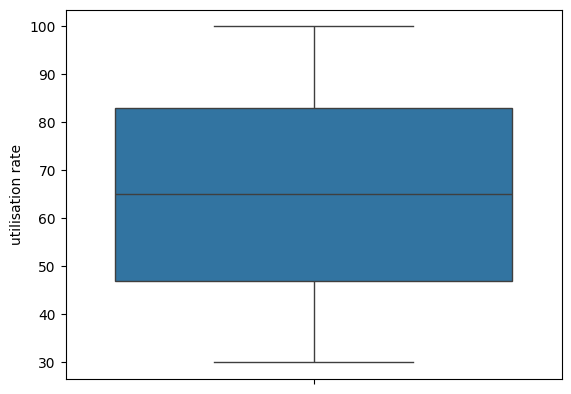

In [13]:
sns.boxplot(df["utilisation rate"])

<Axes: ylabel='air qality index'>

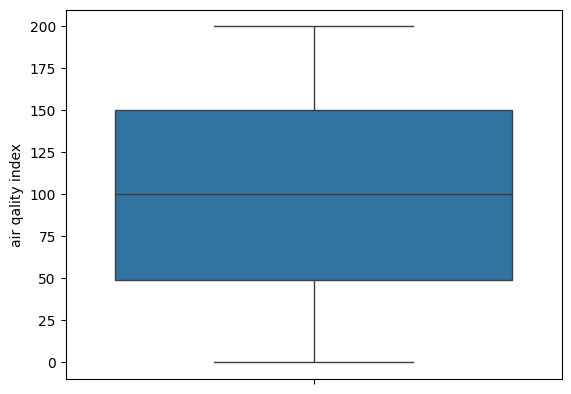

In [14]:
sns.boxplot(df["air qality index"])

<Axes: ylabel='issue reolution time'>

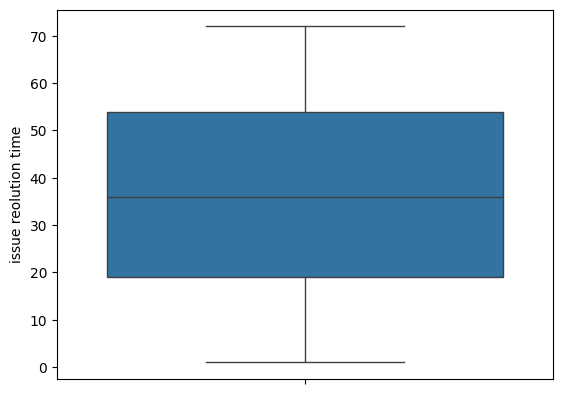

In [15]:
sns.boxplot(df["issue reolution time"])

<Axes: ylabel='resident count'>

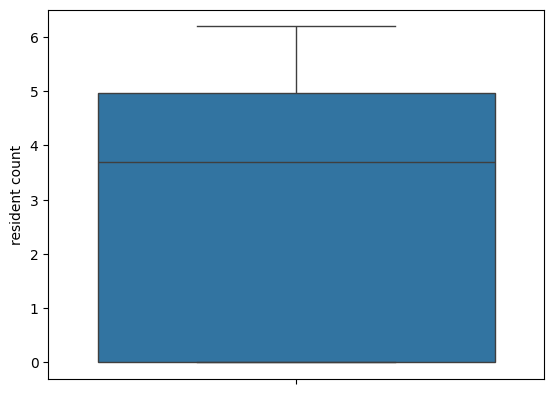

In [16]:
df['resident count']=np.log(df['resident count']+1)
sns.boxplot(df["resident count"])


<Axes: ylabel='electricity cost'>

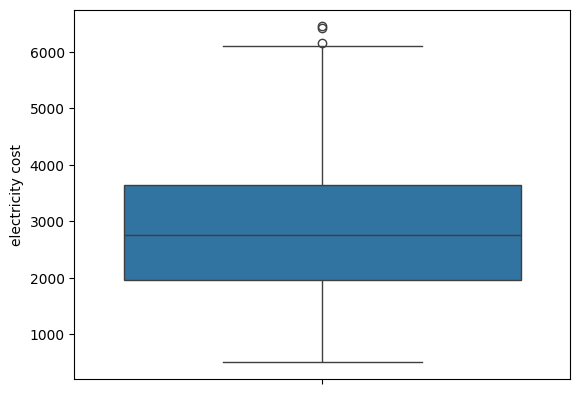

In [17]:
sns.boxplot(df['electricity cost'])

<Axes: ylabel='electricity cost'>

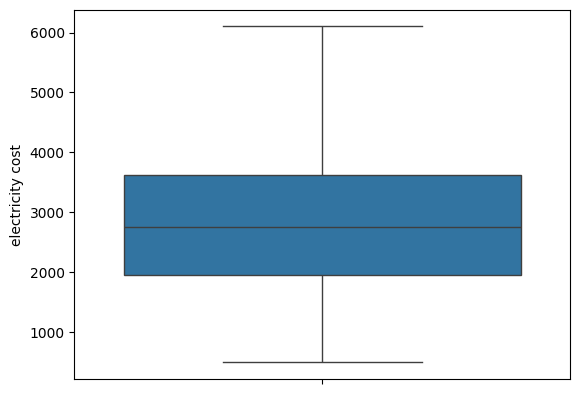

In [18]:
q1=df['electricity cost'].quantile(0.25)
q3=df['electricity cost'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df=df[(df['electricity cost']>lower)& (df['electricity cost']<upper)]
sns.boxplot(df['electricity cost'])

<Axes: >

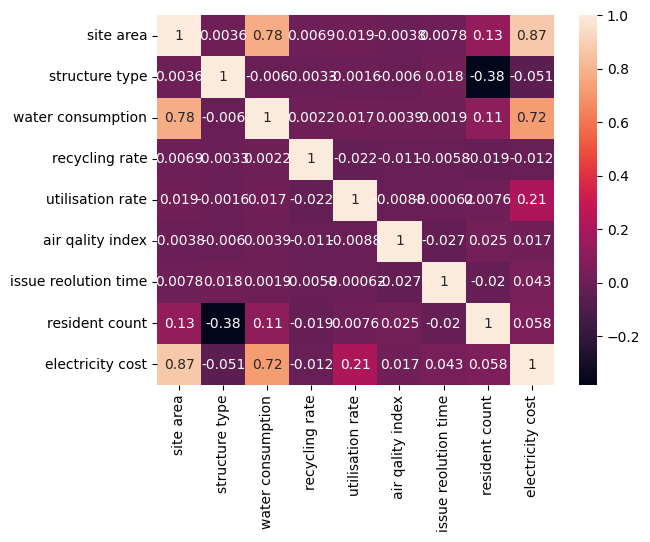

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X=(df[["site area","water consumption"]].values)
y=df["electricity cost"].values
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred=lr.predict(X_test)
print(y_test)
print(y_pred)

[5346. 3834. 4233. ... 2504. 3521. 1420.]
[4392.86412405 3697.26279863 3178.74783642 ... 2601.14659334 3317.61097677
 1579.46747744]


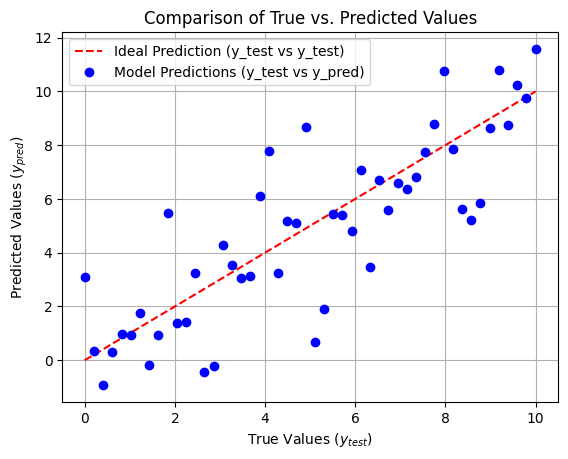

In [29]:
import matplotlib.pyplot as plt
import numpy as np


# 2. Create the plot
#    Plot the ideal line (true values vs. true values)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Prediction (y_test vs y_test)')

#    Plot the actual predictions from the model
plt.plot(y_test, y_pred, color='blue', marker='o', linestyle='', label='Model Predictions (y_test vs y_pred)')

# 3. Add labels, a title, and a legend for clarity
plt.xlabel('True Values ($y_{test}$)')
plt.ylabel('Predicted Values ($y_{pred}$)')
plt.title('Comparison of True vs. Predicted Values')
plt.legend()  # Display the legend to differentiate the lines

# 4. Show the plot
plt.grid(True) # Optional: Add a grid for better readability
plt.show()

In [24]:
lr.score(y_test,y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[5346. 3834. 4233. ... 2504. 3521. 1420.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
X=df.drop('electricity cost',axis=1).values
y=df["electricity cost"].values
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(pred)
print(y_test)
# lr=LinearRegression()
# lr.fit(X_train,y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X=df.drop('electricity cost', axis=1).values
y=df["electricity cost"].values
knn=KNeighborsClassifier()
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=10)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
print(predictions)
print(y_test)

In [ ]:
knn.score(X_test,y_test)